# Before we get started
```
conda install pandas
conda install matplotlib
```

# Why Pandas?

* No more for loops!
* Quick pictures

# How to open a csv file?

In [1]:
ls

README.md       cat_ts_1.ipynb  grad.ipynb
Untitled.ipynb  cat_ts_2.ipynb  graduation.csv


In [5]:
#use the pandas data analytics library
import pandas as pd

In [8]:
#the read_csv function loads in the file,
#which we assign to the df variable
df = pd.read_csv("graduation.csv")

In [10]:
#look at the beginning of the file
#3 is the argument, 3 lines
df.head(3)

,Demographic,Borough,Cohort,Total Cohort,Total Grads,Total Regents,Advanced Regents,Regents w/o Advanced,Local,Still Enrolled,Dropped Out
0,Borough Total,Bronx,2001,11453,4913,2644,998,1646,2271,3512,2438
1,Borough Total,Brooklyn,2001,19961,9758,6177,2829,3348,3591,6101,3547
2,Borough Total,Manhattan,2001,12670,7480,4963,1851,3112,2519,2829,1962


In [14]:
#look at the end of the file
df.tail(3)

,Demographic,Borough,Cohort,Total Cohort,Total Grads,Total Regents,Advanced Regents,Regents w/o Advanced,Local,Still Enrolled,Dropped Out
327,Male,Manhattan,2006,7509,4197,3510,1188,2322,687,2011,931
328,Male,Queens,2006,10202,5887,4874,1572,3302,1013,2554,1378
329,Male,Staten Island,2006,2413,1681,1429,573,856,252,394,235


In [ ]:
#can also view whole, but usually impractical
df

# How do we get a quick overview?

In [15]:
df.describe()

,Cohort,Total Cohort,Total Grads,Total Regents,Advanced Regents,Regents w/o Advanced,Local,Still Enrolled,Dropped Out
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,2003.500000,6590.206061,3690.209091,2692.348485,1028.518182,1663.830303,998.754545,1766.648485,917.948485
std,1.710419,5723.646972,3385.270448,2596.630870,1021.775439,1628.105084,885.764333,1563.177676,784.870098
min,2001.000000,153.000000,36.000000,15.000000,1.000000,12.000000,21.000000,22.000000,6.000000
25%,2002.000000,2100.000000,815.500000,542.750000,236.500000,303.500000,276.000000,524.750000,277.000000
50%,2003.500000,4586.000000,2592.000000,1865.000000,704.500000,1163.500000,683.500000,1287.500000,662.000000
75%,2005.000000,10319.000000,5676.750000,3861.000000,1528.000000,2540.250000,1535.750000,2834.250000,1420.500000
max,2006.000000,22353.000000,13040.000000,10440.000000,3741.000000,6723.000000,3591.000000,6571.000000,3547.000000


In [18]:
 df.describe(include ='all')

,Demographic,Borough,Cohort,Total Cohort,Total Grads,Total Regents,Advanced Regents,Regents w/o Advanced,Local,Still Enrolled,Dropped Out
count,330,330,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
unique,11,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Hispanic,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2003.500000,6590.206061,3690.209091,2692.348485,1028.518182,1663.830303,998.754545,1766.648485,917.948485
std,NaN,NaN,1.710419,5723.646972,3385.270448,2596.630870,1021.775439,1628.105084,885.764333,1563.177676,784.870098
min,NaN,NaN,2001.000000,153.000000,36.000000,15.000000,1.000000,12.000000,21.000000,22.000000,6.000000
25%,NaN,NaN,2002.000000,2100.000000,815.500000,542.750000,236.500000,303.500000,276.000000,524.750000,277.000000
50%,NaN,NaN,2003.500000,4586.000000,2592.000000,1865.000000,704.500000,1163.500000,683.500000,1287.500000,662.000000
75%,NaN,NaN,2005.000000,10319.000000,5676.750000,3861.000000,1528.000000,2540.250000,1535.750000,2834.250000,1420.500000


In [19]:
#lets look at one column
df['Demographic'].head()

0    Borough Total
1    Borough Total
2    Borough Total
3    Borough Total
4    Borough Total
Name: Demographic, dtype: object

In [ ]:
#if you forget the column names
df.keys()

In [20]:
# Lets get the frequency of each demographic 
# also gives us the unique demos
df['Demographic'].value_counts()

Hispanic                       30
General Education              30
English Language Learners      30
Special Education              30
Male                           30
Black                          30
Borough Total                  30
English Proficient Students    30
Asian                          30
White                          30
Female                         30
Name: Demographic, dtype: int64

In [21]:
#Can also quickly figure out what sort of data is in the column
df.dtypes

Demographic              object
Borough                  object
Cohort                    int64
Total Cohort              int64
Total Grads               int64
Total Regents             int64
Advanced Regents          int64
Regents w/o Advanced      int64
Local                     int64
Still Enrolled            int64
Dropped Out               int64
dtype: object

# How do the columns relate to each other ?

In [27]:
#lets look at for columns
print(df.keys())
df[['Total Cohort', 'Total Grads', 'Still Enrolled','Dropped Out']][15:35:2]

Index(['Demographic', 'Borough', 'Cohort', 'Total Cohort', 'Total Grads',
       'Total Regents', 'Advanced Regents', 'Regents w/o Advanced ', 'Local',
       'Still Enrolled', 'Dropped Out'],
      dtype='object')


,Total Cohort,Total Grads,Still Enrolled,Dropped Out
15,2259,309,561,866
17,1586,292,407,553
19,622,184,184,160
21,17259,9356,5232,2600
23,15012,8761,4120,2053
25,638,479,92,60
27,1581,1265,210,97
29,333,268,46,16
31,9382,4232,3284,1543
33,4600,2146,1485,810


In [29]:
#row slicing
df['Total Cohort'][5:36:5]

5     1984
10    9469
15    2259
20    9194
25     638
30    3852
35    6150
Name: Total Cohort, dtype: int64

In [33]:
#one row of data
row_100 = df[['Total Grads', 'Still Enrolled','Dropped Out']].iloc[100]
print(row_100)

Total Grads       2921
Still Enrolled    1832
Dropped Out        880
Name: 100, dtype: int64


Borough         Bronx
Demographic    Female
Name: 100, dtype: object


<IPython.core.display.Javascript object>


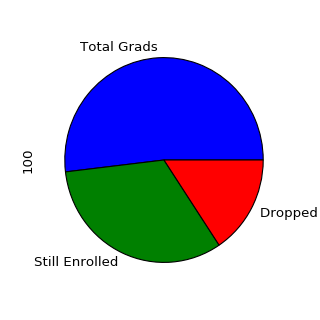

In [34]:
%matplotlib notebook
print(df[['Borough', 'Demographic']].iloc[100])
row_100.plot(kind="pie",figsize=(4, 4))


# View more than 1 row?

In [ ]:
df.plot?

<IPython.core.display.Javascript object>


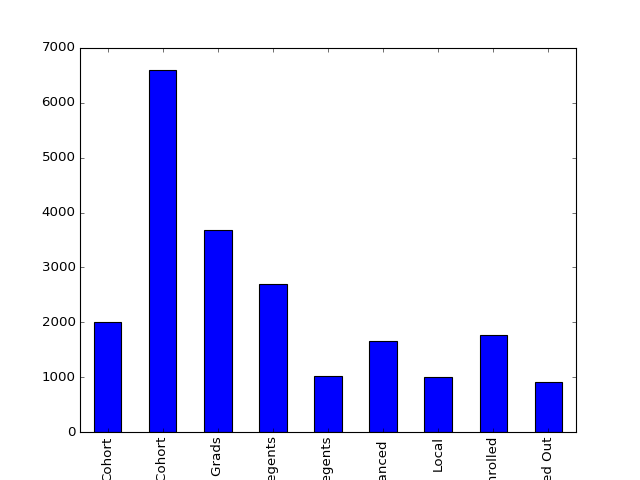

In [38]:
%matplotlib notebook
df.mean().plot(kind="bar")

In [ ]:
#Compare two 
df[['Total Cohort', 'Total Grads']].plot(kind='hist')

<IPython.core.display.Javascript object>


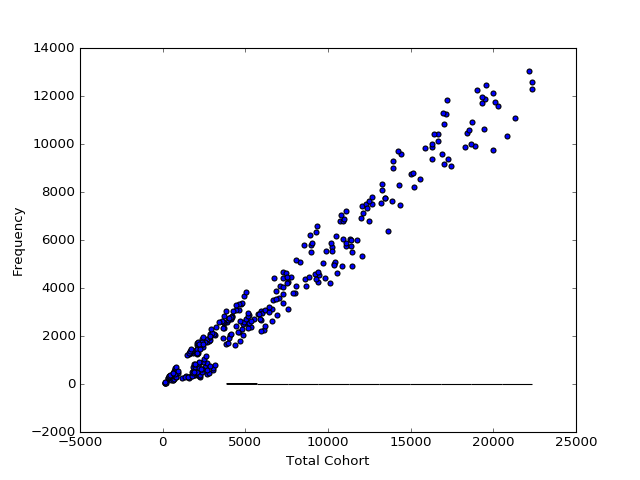

In [39]:
#show relationship
df.plot(kind='scatter', x='Total Cohort', y='Total Grads')

In [41]:
df['Demographic'].unique()

array(['Borough Total', 'English Language Learners',
       'English Proficient Students', 'Special Education',
       'General Education', 'Asian', 'Black', 'Hispanic', 'White',
       'Female', 'Male'], dtype=object)

Activity
=========
Compare the different types of regent grads to each other and the total cohort. 

In [ ]:
#filtering: lets first look at our demographics
df['Demographic'].unique()

# What mistake did we make in our graphs? 

# How can we filter this data?

In [44]:
#lets just compare male and female rates instead
#http://pandas.pydata.org/pandas-docs/stable/text.html
bar_tot = df['Demographic'].str.contains('Borough Total')

bar_tot

0       True
1       True
2       True
3       True
4       True
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
300    False
301    False
302    False
303    False
304    False
305    False
306    False
307    False
308    False
309    False
310    False
311    False
312    False
313    False
314    False
315    False
316    False
317    False
318    False
319    False
320    False
321    False
322    False
323    False
324    False
325    False
326    False
327    False
328    False
329    False
Name: Demographic, dtype: bool

In [51]:
for value in df['Demographic']:
    if 'Borough Total' in value:
        print(True)
    else:
        print(False)

True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True


In [54]:
bar_to = df['Demographic'].str.contains("Borough Total")

In [55]:
# lets apply that filter to our data
print(len(df[bar_tot]))
df[bar_tot]

30


,Demographic,Borough,Cohort,Total Cohort,Total Grads,Total Regents,Advanced Regents,Regents w/o Advanced,Local,Still Enrolled,Dropped Out
0,Borough Total,Bronx,2001,11453,4913,2644,998,1646,2271,3512,2438
1,Borough Total,Brooklyn,2001,19961,9758,6177,2829,3348,3591,6101,3547
2,Borough Total,Manhattan,2001,12670,7480,4963,1851,3112,2519,2829,1962
3,Borough Total,Queens,2001,17011,9180,6452,2694,3758,2738,4679,2696
4,Borough Total,Staten Island,2001,3872,2565,1901,876,1025,665,786,417
55,Borough Total,Bronx,2002,12032,5328,3118,992,2126,2217,4047,2140
56,Borough Total,Brooklyn,2002,20808,10337,7050,2865,4185,3298,6368,3369
57,Borough Total,Manhattan,2002,13463,7746,5497,1872,3625,2259,3561,1743
58,Borough Total,Queens,2002,18262,9869,7250,2837,4413,2624,4961,2816
59,Borough Total,Staten Island,2002,4134,2721,2040,861,1179,683,844,426


<IPython.core.display.Javascript object>


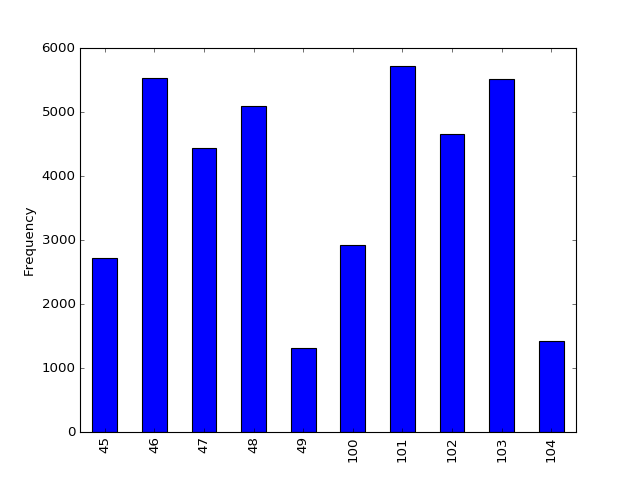

In [59]:
#hard to see, so lets visualize
%matplotlib notebook
df['Total Cohort'][bar_tot].plot(kind="hist")

In [ ]:
df[bar_tot].plot(kind="scatter", x="Total Cohort", y="Total Grads")

In [62]:
# Lets find  cohorts before 2003
early = (df['Cohort']<2003)
df[early]

,Demographic,Borough,Cohort,Total Cohort,Total Grads,Total Regents,Advanced Regents,Regents w/o Advanced,Local,Still Enrolled,Dropped Out
0,Borough Total,Bronx,2001,11453,4913,2644,998,1646,2271,3512,2438
1,Borough Total,Brooklyn,2001,19961,9758,6177,2829,3348,3591,6101,3547
2,Borough Total,Manhattan,2001,12670,7480,4963,1851,3112,2519,2829,1962
3,Borough Total,Queens,2001,17011,9180,6452,2694,3758,2738,4679,2696
4,Borough Total,Staten Island,2001,3872,2565,1901,876,1025,665,786,417
5,English Language Learners,Bronx,2001,1984,388,78,10,68,311,799,592
6,English Language Learners,Brooklyn,2001,2543,691,268,116,152,424,1070,658
7,English Language Learners,Manhattan,2001,1956,691,237,49,188,454,592,527
8,English Language Learners,Queens,2001,2689,873,362,136,226,512,1023,673
9,English Language Learners,Staten Island,2001,171,42,16,4,12,26,78,38


In [65]:
#lets find female cohorts before 2003
female = df['Demographic'].str.contains('Female')
early = (df['Cohort']<2003)
fe = df[female & early]
fe

,Demographic,Borough,Cohort,Total Cohort,Total Grads,Total Regents,Advanced Regents,Regents w/o Advanced,Local,Still Enrolled,Dropped Out
45,Female,Bronx,2001,5532,2711,1409,519,890,1305,1547,1052
46,Female,Brooklyn,2001,9849,5538,3455,1568,1887,2086,2656,1446
47,Female,Manhattan,2001,6720,4434,2995,1040,1955,1440,1286,831
48,Female,Queens,2001,8327,5089,3600,1566,2034,1496,1991,1064
49,Female,Staten Island,2001,1805,1307,964,453,511,344,304,149
100,Female,Bronx,2002,5835,2921,1652,474,1178,1273,1832,880
101,Female,Brooklyn,2002,10253,5723,3861,1534,2327,1867,2827,1388
102,Female,Manhattan,2002,7277,4652,3265,990,2275,1394,1645,806
103,Female,Queens,2002,8976,5511,4032,1695,2337,1484,2091,1124
104,Female,Staten Island,2002,2023,1426,1092,461,631,335,341,186


<IPython.core.display.Javascript object>


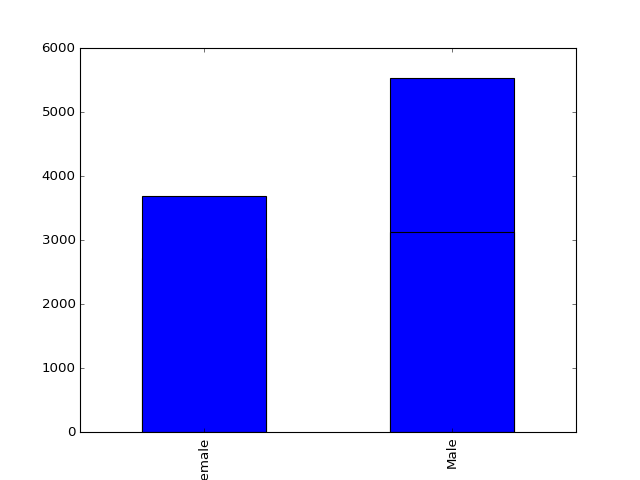

In [67]:
%matplotlib notebook
fe['Total Grads'].plot(kind='bar')

In [72]:
fe.iloc[5]

Demographic              Female
Borough                   Bronx
Cohort                     2002
Total Cohort               5835
Total Grads                2921
Total Regents              1652
Advanced Regents            474
Regents w/o Advanced       1178
Local                      1273
Still Enrolled             1832
Dropped Out                 880
Name: 100, dtype: object

Activity
========
* Find graduation rates for Asian students in cohorts with more than 5000 students 
* Find graduation rates for Hispanic students in the Bronx

# How can we use all the data together?

In [ ]:
#Can use columns just like variables
percent = df['Total Grads']/df['Total Cohort']
percent.head()

In [73]:
#make new column
df["percent graduated"]=df['Total Grads']/df['Total Cohort']
df.to_csv("my_csv.csv")
df

,Demographic,Borough,Cohort,Total Cohort,Total Grads,Total Regents,Advanced Regents,Regents w/o Advanced,Local,Still Enrolled,Dropped Out,percent graduated
0,Borough Total,Bronx,2001,11453,4913,2644,998,1646,2271,3512,2438,0.428971
1,Borough Total,Brooklyn,2001,19961,9758,6177,2829,3348,3591,6101,3547,0.488853
2,Borough Total,Manhattan,2001,12670,7480,4963,1851,3112,2519,2829,1962,0.590371
3,Borough Total,Queens,2001,17011,9180,6452,2694,3758,2738,4679,2696,0.539651
4,Borough Total,Staten Island,2001,3872,2565,1901,876,1025,665,786,417,0.662448
5,English Language Learners,Bronx,2001,1984,388,78,10,68,311,799,592,0.195565
6,English Language Learners,Brooklyn,2001,2543,691,268,116,152,424,1070,658,0.271726
7,English Language Learners,Manhattan,2001,1956,691,237,49,188,454,592,527,0.353272
8,English Language Learners,Queens,2001,2689,873,362,136,226,512,1023,673,0.324656
9,English Language Learners,Staten Island,2001,171,42,16,4,12,26,78,38,0.245614


In [75]:
#What about more complicated computations?
def GSI(indicators):
    cohort, grad, enrolled, dropped = indicators
    "Graduation Success Index"
    return (grad*3 - enrolled - dropped*2)/cohort
        

In [76]:
#apply it to the data?
first = df[['Total Cohort', 'Total Grads', 'Still Enrolled', 'Total Grads']].iloc[0]
print (first)
print(GSI(first))

Total Cohort      11453
Total Grads        4913
Still Enrolled     3512
Total Grads        4913
Name: 0, dtype: int64
0.122326028115


# How do we apply to the whole data set?

In [79]:
#axis = 0 says apply to rows
#axis = 1 means apply to columns
#goes one row (1) or column (0) at a time
tcol = ['Total Cohort', 'Total Grads', 'Still Enrolled', 'Total Grads']
gsi = df[tcol][bar_tot].apply(GSI, axis=1)

In [ ]:
#test if our indicator correlates to anything
%matplotlib inline
df.plot(kind="scatter", x="Total Cohort", y="GSI")

In [ ]:
#lets add GSI into the dataframe
df['GSI'] = gsi
df.head()

Activity
=========
* Create a regents indicator: 
    `(Advanced Regents*3+ Regents w/o*2 + Local) / Total Regents`
* Create a function that computes a regents indicator 
* Apply the function to the dataframe 
* Create a new column RSI that stores the index for each row

# BREAK

# How can we start summarizing data?

In [89]:
#groupby is for one function
demo = df.groupby("Borough")

In [87]:
#can use any function
demo.mean()

,Cohort,Total Cohort,Total Grads,Total Regents,Advanced Regents,Regents w/o Advanced,Local,Still Enrolled,Dropped Out,percent graduated
Borough,,,,,,,,,,
Bronx,2003.5,6221.015152,3088.378788,1979.939394,585.590909,1394.348485,1109.121212,1796.893939,1052.060606,0.494829
Brooklyn,2003.5,9757.924242,5228.772727,3763.287879,1514.045455,2249.242424,1467.075758,2835.727273,1392.318182,0.504551
Manhattan,2003.5,6612.833333,3922.484848,2931.242424,1098.590909,1832.651515,992.075758,1699.893939,799.075758,0.570101
Queens,2003.5,8434.242424,4899.257576,3756.363636,1497.545455,2258.818182,1144.030303,2134.969697,1166.636364,0.541110
Staten Island,2003.5,1925.015152,1312.151515,1030.909091,446.818182,584.090909,281.469697,365.757576,179.651515,0.615998


In [83]:
demo.std()

,Cohort,Total Cohort,Total Grads,Total Regents,Advanced Regents,Regents w/o Advanced,Local,Still Enrolled,Dropped Out,percent graduated
Borough,,,,,,,,,,
Bronx,1.720912,4526.338046,2523.854993,1761.825800,490.913810,1303.192630,832.204940,1256.471398,716.212020,0.169274
Brooklyn,1.720912,7036.656154,4111.862718,3093.109239,1230.571505,1919.091003,1128.226427,1993.077316,925.927180,0.150799
Manhattan,1.720912,4790.997714,3076.051671,2424.399663,910.866603,1577.598599,745.774235,1203.960901,532.509828,0.170288
Queens,1.720912,5904.293739,3748.398859,3016.585052,1237.529377,1818.723355,792.481652,1417.357964,756.371574,0.145544
Staten Island,1.720912,1456.268070,1078.456935,887.859773,396.749016,495.048086,206.282795,249.175073,121.177491,0.172133


In [98]:
#can group by two catagories:
bt = df.groupby(["Demographic", "Borough"]).mean()

In [99]:
#sometimes looks better flipped
#transpose filp rows and cols
bt.T
bt.T.to_csv("tocsv.csv")
bt.T.to_csv("orgiganl_filename")

In [102]:
#can filter on cols
bt[["Total Cohort"]]

Total Cohort
Demographic                 Borough                    
Asian                       Bronx            720.333333
                            Brooklyn        2762.166667
                            Manhattan       1873.000000
                            Queens          4714.833333
                            Staten Island    366.666667
Black                       Bronx           4572.000000
                            Brooklyn       10429.166667
                            Manhattan       4157.833333
                            Queens          4963.666667
                            Staten Island    714.833333
Borough Total               Bronx          13705.833333
                            Brooklyn       21494.000000
                            Manhattan      14566.333333
                            Queens         18580.333333
                            Staten Island   4238.166667
English Language Learners   Bronx           1926.500000
                            Brooklyn        2133.333333
                            Manhattan       1809.000000
                            Queens          2390.166667
                            Staten Island    169.666667
English Proficient Students Bronx          11779.333333
                            Brooklyn       19360.666667
                            Manhattan      12757.333333
                            Queens         16190.166667
                            Staten Island   4068.500000
Female                      Bronx           6655.500000
                            Brooklyn       10538.833333
                            Manhattan       7834.166667
                            Queens          8988.333333
                            Staten Island   2066.500000
General Education           Bronx          11361.166667
                            Brooklyn       18671.166667
                            Manhattan      12869.500000
                            Queens         16587.500000
                            Staten Island   3571.500000
Hispanic                    Bronx           7638.500000
                            Brooklyn        4945.333333
                            Manhattan       6822.333333
                            Queens          6215.000000
                            Staten Island    790.833333
Male                        Bronx           7050.333333
                            Brooklyn       10955.166667
                            Manhattan       6732.166667
                            Queens          9592.000000
                            Staten Island   2171.666667
Special Education           Bronx           2344.666667
                            Brooklyn        2822.833333
                            Manhattan       1696.833333
                            Queens          1992.833333
                            Staten Island    666.666667
White                       Bronx            677.000000
                            Brooklyn        3224.500000
                            Manhattan       1622.666667
                            Queens          2561.833333
                            Staten Island   2350.166667

In [103]:
#Can do groupby on filtered data
male = df['Demographic'].str.contains("Male")
female = df['Demographic'].str.contains("Female")
binary = df[(male | female)].groupby(["Borough", "Demographic"]).mean()
binary

Cohort  Total Cohort  Total Grads  Total Regents  \
Borough       Demographic                                                     
Bronx         Female       2003.5   6655.500000  3684.666667    2337.166667   
              Male         2003.5   7050.333333  3120.500000    2025.833333   
Brooklyn      Female       2003.5  10538.833333  6353.166667    4548.333333   
              Male         2003.5  10955.166667  5164.333333    3741.333333   
Manhattan     Female       2003.5   7834.166667  5146.833333    3841.833333   
              Male         2003.5   6732.166667  3494.166667    2615.833333   
Queens        Female       2003.5   8988.333333  5863.000000    4482.500000   
              Male         2003.5   9592.000000  4929.333333    3791.500000   
Staten Island Female       2003.5   2066.500000  1504.000000    1182.833333   
              Male         2003.5   2171.666667  1384.333333    1086.333333   

                           Advanced Regents  Regents w/o Advanced   \
Borough       Demographic                                            
Bronx         Female             659.166667            1678.000000   
              Male               631.166667            1394.666667   
Brooklyn      Female            1826.666667            2721.666667   
              Male              1508.166667            2233.166667   
Manhattan     Female            1379.500000            2462.333333   
              Male              1039.666667            1576.166667   
Queens        Female            1860.333333            2622.166667   
              Male              1437.166667            2354.333333   
Staten Island Female             524.833333             658.000000   
              Male               458.500000             627.833333   

                                 Local  Still Enrolled  Dropped Out  \
Borough       Demographic                                             
Bronx         Female       1348.666667     1756.000000   979.333333   
              Male         1095.000000     2202.833333  1337.666667   
Brooklyn      Female       1806.166667     2670.000000  1253.833333   
              Male         1425.166667     3577.166667  1812.166667   
Manhattan     Female       1306.333333     1736.166667   779.333333   
              Male          878.833333     2008.166667   980.166667   
Queens        Female       1382.500000     1923.666667  1009.166667   
              Male         1138.333333     2779.166667  1561.833333   
Staten Island Female        321.500000      332.833333   165.000000   
              Male          298.166667      472.833333   230.666667   

                           percent graduated  
Borough       Demographic                     
Bronx         Female                0.548805  
              Male                  0.437203  
Brooklyn      Female                0.601697  
              Male                  0.469829  
Manhattan     Female                0.655394  
              Male                  0.517051  
Queens        Female                0.651271  
              Male                  0.511971  
Staten Island Female                0.727245  
              Male                  0.635749

<IPython.core.display.Javascript object>


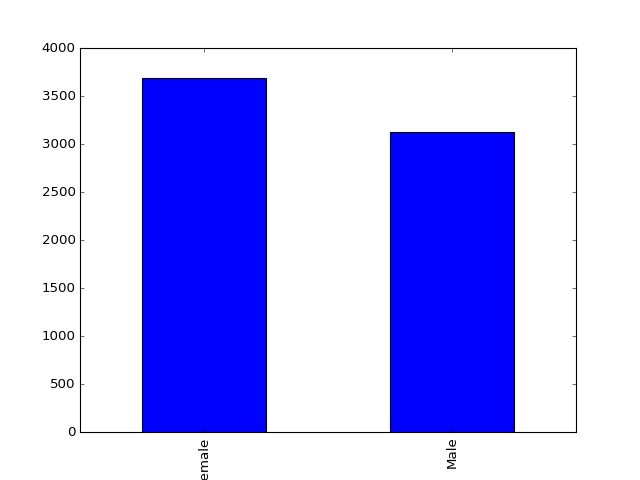

In [112]:
%matplotlib notebook
#filter along table (Indexing)
binary["Total Grads"]["Bronx"].plot(kind='Bar')

In [ ]:
#can groupby indefinite number of levels
many = df[(male | female)].groupby(["Borough", "Demographic", "Cohort"]).mean()
many

# what if we want more than 1 function?

In [107]:
# total number of items but the last start date
"""index becomes the row agg function is how 
data in each subset->(Station, Date) is analyzed:
* first argument is the column being analyzed
* second is aggregating function:
    * total items
    * max start date
"""
#now fancy grouping
df_pivot = df[(male|female)].pivot_table(index='Cohort',
                          columns = "Demographic",
            aggfunc={'Borough':'count',
                     'Total Grads':'median',
                     'Still Enrolled':'max',
                     'Dropped Out':'sum',
                     'percent graduated': 'std'})
df_pivot

Borough      percent graduated           Total Grads          \
Demographic  Female Male            Female      Male      Female    Male   
Cohort                                                                     
2001            5.0  5.0          0.089671  0.091078      4434.0  3046.0   
2002            5.0  5.0          0.077962  0.084471      4652.0  3094.0   
2003            5.0  5.0          0.071215  0.076538      4619.0  2994.0   
2004            5.0  5.0          0.052034  0.064027      5178.0  3602.0   
2005            5.0  5.0          0.050746  0.066147      5784.0  4032.0   
2006            5.0  5.0          0.062317  0.074738      6214.0  4197.0   

            Dropped Out         Still Enrolled          
Demographic      Female    Male         Female    Male  
Cohort                                                  
2001             4542.0  6518.0         2656.0  3445.0  
2002             4384.0  6110.0         2827.0  3541.0  
2003             4306.0  6185.0         2808.0  3763.0  
2004             4105.0  5899.0         2731.0  3756.0  
2005             3740.0  5379.0         2679.0  3641.0  
2006             4043.0  5444.0         2319.0  3317.0

<IPython.core.display.Javascript object>


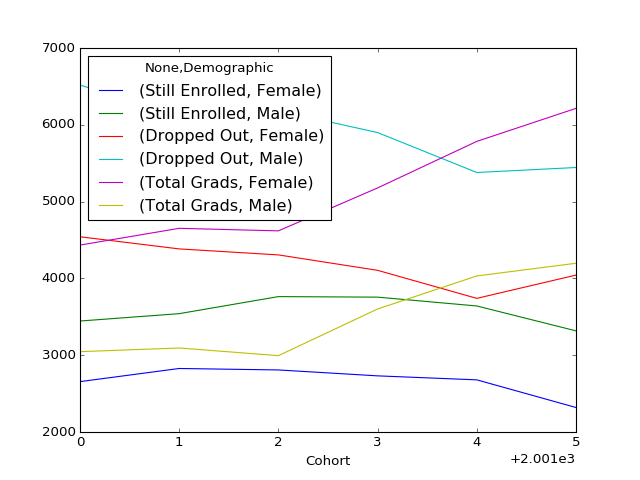

In [109]:
df_pivot[['Still Enrolled', 'Dropped Out', 'Total Grads']].plot()

In [ ]:
#Any other cat grouping

df['Demographic'].unique()
asian = df['Demographic'].str.contains("Asian")
black = df['Demographic'].str.contains("Black")
hispanic = df['Demographic'].str.contains("Hispanic")
white = df['Demographic'].str.contains("White")
ind_cols = ["Total Cohort","Total Grads", "Still Enrolled", ""]
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df[asian|black|hispanic|white], 'Demographic', cols=["Total "])

In [ ]:
parallel_coordinates?